# Import libraries

In [1]:
import numpy as np
import pandas as pd

# Data Exploration

In [2]:
data = pd.read_csv("ev_data.csv" , encoding= 'unicode_escape')

# Data Processing

In [3]:
data.head()

,consumption(kWh/100km),model,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,Unnamed: 14,A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note
0,14.63,i-MiEV,i-MiEV,49,07.02.2019,176977,50.7,6.50,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,NaN,"Noch 6 Balken, 33km Reichweite, Mainova Ökostr..."
1,14.63,i-MiEV,i-MiEV,49,06.02.2019,176926,49.9,7.30,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.37,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
2,13.79,i-MiEV,i-MiEV,49,05.02.2019,176876,51.5,7.10,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-1.21,"Noch 6B, 36km RRW, Batterie 8-11°C, 9,3°C, 41,..."
3,14.10,i-MiEV,i-MiEV,49,04.02.2019,176824,52.5,7.40,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.90,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
4,14.47,i-MiEV,i-MiEV,49,03.02.2019,176772,0.5,1.65,Electricity,Winter tires,1,0,0,Normal,NaN,0,0,NaN,-0.53,"Noch 15 Balken, 75km Reichweite, 85,5%, Batter..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   consumption(kWh/100km)  1236 non-null   float64
 1   model                   1285 non-null   object 
 2   version                 1285 non-null   object 
 3   power(kW)               1285 non-null   int64  
 4   fuel_date               1285 non-null   object 
 5   odometer                1285 non-null   int64  
 6   trip_distance(km)       1285 non-null   float64
 7   quantity(kWh)           1246 non-null   float64
 8   fuel_type               1285 non-null   object 
 9   tire_type               1285 non-null   object 
 10  city                    1285 non-null   int64  
 11  motor_way               1285 non-null   int64  
 12  country_roads           1285 non-null   int64  
 13  driving_style           1285 non-null   object 
 14  Unnamed: 14             0 non-null      

In [5]:
objList = data.columns
print(objList)

Index(['consumption(kWh/100km)', 'model', 'version', 'power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'Unnamed: 14', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note'],
      dtype='object')


In [6]:
missing_data = data.isnull().sum()
print(missing_data)

consumption(kWh/100km)      49
model                        0
version                      0
power(kW)                    0
fuel_date                    0
odometer                     0
trip_distance(km)            0
quantity(kWh)               39
fuel_type                    0
tire_type                    0
city                         0
motor_way                    0
country_roads                0
driving_style                0
Unnamed: 14               1285
A/C                          0
park_heating                 0
avg_speed(km/h)           1285
ecr_deviation               51
fuel_note                    1
dtype: int64


In [7]:
data = data.drop(['model','version','fuel_date' ,], axis=1, errors='ignore')

In [8]:
missing_data = data.isnull().sum()
print(missing_data)

consumption(kWh/100km)      49
power(kW)                    0
odometer                     0
trip_distance(km)            0
quantity(kWh)               39
fuel_type                    0
tire_type                    0
city                         0
motor_way                    0
country_roads                0
driving_style                0
Unnamed: 14               1285
A/C                          0
park_heating                 0
avg_speed(km/h)           1285
ecr_deviation               51
fuel_note                    1
dtype: int64


In [9]:
data.head()

,consumption(kWh/100km),power(kW),odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,Unnamed: 14,A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note
0,14.63,49,176977,50.7,6.50,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,NaN,"Noch 6 Balken, 33km Reichweite, Mainova Ökostr..."
1,14.63,49,176926,49.9,7.30,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.37,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
2,13.79,49,176876,51.5,7.10,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-1.21,"Noch 6B, 36km RRW, Batterie 8-11°C, 9,3°C, 41,..."
3,14.10,49,176824,52.5,7.40,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.90,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
4,14.47,49,176772,0.5,1.65,Electricity,Winter tires,1,0,0,Normal,NaN,0,0,NaN,-0.53,"Noch 15 Balken, 75km Reichweite, 85,5%, Batter..."


In [10]:
df = pd.DataFrame(data)
    
df

,consumption(kWh/100km),power(kW),odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,Unnamed: 14,A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note
0,14.63,49,176977,50.7,6.50,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,NaN,"Noch 6 Balken, 33km Reichweite, Mainova Ökostr..."
1,14.63,49,176926,49.9,7.30,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.37,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
2,13.79,49,176876,51.5,7.10,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-1.21,"Noch 6B, 36km RRW, Batterie 8-11°C, 9,3°C, 41,..."
3,14.10,49,176824,52.5,7.40,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.90,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
4,14.47,49,176772,0.5,1.65,Electricity,Winter tires,1,0,0,Normal,NaN,0,0,NaN,-0.53,"Noch 15 Balken, 75km Reichweite, 85,5%, Batter..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,11.96,49,115172,82.8,9.90,Electricity,Summer tires,1,0,1,Normal,NaN,1,0,NaN,-3.04,"Noch 4 Balken, 34km Reichweite, 33,0%, Batteri..."
1281,10.91,49,115089,12.4,5.68,Electricity,Summer tires,1,0,1,Normal,NaN,0,0,NaN,-4.09,"Noch 10 Balken, 81km Reichweite, 2,75h geladen..."
1282,10.91,49,115077,29.3,4.00,Electricity,Summer tires,1,0,1,Normal,NaN,1,0,NaN,-4.09,"Noch 6 Balken, 49km Reichweite, 44,0%, Batteri..."
1283,10.91,49,115048,95.2,5.25,Electricity,Summer tires,0,1,1,Normal,NaN,1,0,NaN,-4.09,"Noch 4 Balken, 26km Reichweite, 29,5%, Batteri..."


In [11]:
df = df.dropna(how = 'any')

In [12]:
missing_data = df.isnull().sum()
print(missing_data)

consumption(kWh/100km)    0.0
power(kW)                 0.0
odometer                  0.0
trip_distance(km)         0.0
quantity(kWh)             0.0
fuel_type                 0.0
tire_type                 0.0
city                      0.0
motor_way                 0.0
country_roads             0.0
driving_style             0.0
Unnamed: 14               0.0
A/C                       0.0
park_heating              0.0
avg_speed(km/h)           0.0
ecr_deviation             0.0
fuel_note                 0.0
dtype: float64


In [13]:
df.head()

,consumption(kWh/100km),power(kW),odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,Unnamed: 14,A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note


In [14]:
df = df.drop(['fuel_note'], axis=1, errors='ignore')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   consumption(kWh/100km)  0 non-null      float64
 1   power(kW)               0 non-null      int64  
 2   odometer                0 non-null      int64  
 3   trip_distance(km)       0 non-null      float64
 4   quantity(kWh)           0 non-null      float64
 5   fuel_type               0 non-null      object 
 6   tire_type               0 non-null      object 
 7   city                    0 non-null      int64  
 8   motor_way               0 non-null      int64  
 9   country_roads           0 non-null      int64  
 10  driving_style           0 non-null      object 
 11  Unnamed: 14             0 non-null      float64
 12  A/C                     0 non-null      int64  
 13  park_heating            0 non-null      int64  
 14  avg_speed(km/h)         0 non-null      float64
 15  e

In [17]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['fuel_type']= label_encoder.fit_transform(df['fuel_type'])
df['tire_type']= label_encoder.fit_transform(df['tire_type'])
df['driving_style']= label_encoder.fit_transform(df['driving_style'])

df['fuel_type'].unique()
df['tire_type'].unique()
df['driving_style'].unique()

ModuleNotFoundError: No module named 'sklearn'

# Visualization - EDA

In [ ]:
#import seaborn as sns
#sns.countplot(x="consumption(kWh/100km)", data = df)

C:\Users\Shiva\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Shiva\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

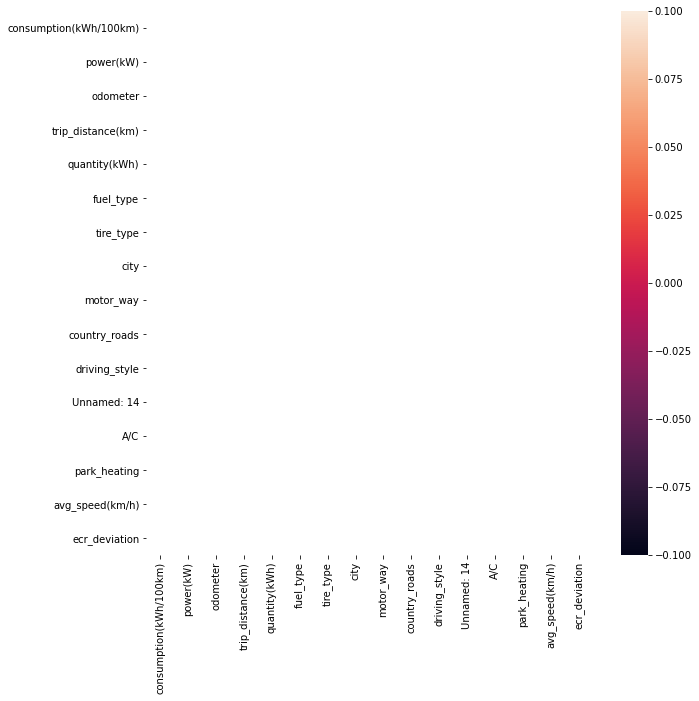

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
i = 1.4
e = 2.8
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#plt.figure(figsize=(5,5))
#sns.countplot(data=df,x='consumption(kWh/100km)',hue='tire_type')

In [ ]:
#plt.figure(figsize=(5,5))
#sns.countplot(data=df,x='power',hue='tire_type')

# Feature Selection

In [ ]:
print(df.shape)

(0, 16)


In [ ]:
X = df.iloc[:, 1:16]
y = df.iloc[:,0]

In [ ]:
y

Series([], Name: consumption(kWh/100km), dtype: float64)

In [ ]:
X

,power(kW),odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,Unnamed: 14,A/C,park_heating,avg_speed(km/h),ecr_deviation


# Data Splitting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Machine Learning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for RF: 
[[ 942    0    0 ...    0    0    0]
 [   0 1854   86 ...    0    0    0]
 [   0  307  392 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
val1 = accuracy_score(y_test, predictions)*100
print(val1)

67.0358193459076


In [ ]:
print("Classification Report for RF: ")
print(classification_report(y_test, predictions))

Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       0.86      0.94      0.90      1962
           2       0.64      0.46      0.53       861
           3       0.47      0.54      0.50       433
           4       0.44      0.38      0.41       281
           5       0.34      0.39      0.36       210
           6       0.44      0.57      0.49       212
           7       0.19      0.14      0.16       114
           8       0.34      0.40      0.36       124
           9       0.29      0.28      0.29        89
          10       0.23      0.19      0.21        90
          11       0.12      0.16      0.14        50
          12       0.05      0.05      0.05        43
          13       0.19      0.08      0.12        48
          14       0.16      0.13      0.15        30
          15       0.10      0.11      0.10        19
          16       0.21      0.24      0.22       

/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/

In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 0.06730766004842152
precision score 0.06867647789375503
recall score 0.06828975670968385


/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for DT: 
[[ 942    0    0 ...    0    0    0]
 [   0 1852   88 ...    0    0    0]
 [   0  309  390 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    1    0]]


In [ ]:
val2 = accuracy_score(y_test, predictions) *100
print(val2)

66.74165080463747


In [ ]:
print("Classification Report for DT: ")
print(classification_report(y_test, predictions))

Classification Report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       0.85      0.94      0.90      1962
           2       0.64      0.45      0.53       861
           3       0.47      0.54      0.50       433
           4       0.41      0.44      0.42       281
           5       0.33      0.28      0.30       210
           6       0.44      0.57      0.49       212
           7       0.20      0.14      0.16       114
           8       0.29      0.40      0.33       124
           9       0.27      0.27      0.27        89
          10       0.21      0.18      0.19        90
          11       0.14      0.16      0.15        50
          12       0.07      0.07      0.07        43
          13       0.22      0.15      0.18        48
          14       0.16      0.17      0.16        30
          15       0.08      0.11      0.09        19
          16       0.00      0.00      0.00       

/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/

In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 0.06351647254386801
precision score 0.07011399128760987
recall score 0.06240579282292432


/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Voting Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[ 942    0    0 ...    0    0    0]
 [   0 1856   84 ...    0    0    0]
 [   0  309  389 ...    0    0    0]
 ...
 [   0    1    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
val3 = accuracy_score(y_test, predictions)* 100
print(val3)

66.74165080463747


In [ ]:
print("Classification Report for Vot: ")
print(classification_report(y_test, predictions))

Classification Report for Vot: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       0.83      0.95      0.89      1962
           2       0.65      0.45      0.53       861
           3       0.46      0.55      0.50       433
           4       0.41      0.44      0.43       281
           5       0.33      0.29      0.31       210
           6       0.43      0.57      0.49       212
           7       0.20      0.13      0.16       114
           8       0.27      0.40      0.32       124
           9       0.25      0.25      0.25        89
          10       0.19      0.17      0.18        90
          11       0.13      0.16      0.14        50
          12       0.05      0.05      0.05        43
          13       0.22      0.12      0.16        48
          14       0.16      0.20      0.18        30
          15       0.05      0.05      0.05        19
          16       0.00      0.00      0.00      

/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/

In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 0.06323265771603666
precision score 0.06566334746240093
recall score 0.06346380522072127


/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for LR: 
[[ 942    0    0 ...    0    0    0]
 [ 125 1726   81 ...    0    0    0]
 [  58  558  130 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


/home/user/test/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
val4 = accuracy_score(y_test, predictions) * 100
print(val4)

49.19536251946703


In [ ]:
print("Classification Report for LR: ")
print(classification_report(y_test, predictions))

Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       942
           1       0.69      0.88      0.78      1962
           2       0.19      0.15      0.17       861
           3       0.05      0.04      0.05       433
           4       0.07      0.08      0.08       281
           5       0.00      0.00      0.00       210
           6       0.00      0.00      0.00       212
           7       0.00      0.00      0.00       114
           8       0.00      0.00      0.00       124
           9       0.01      0.01      0.01        89
          10       0.00      0.00      0.00        90
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        48
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        19
          16       0.01      0.08      0.01       

/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/

In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, predictions, average='macro'))
print ("precision score",metrics.precision_score(y_test, predictions, average='macro'))
print ("recall score",metrics.recall_score(y_test, predictions, average='macro'))

f1 score macro 0.020917282877254948
precision score 0.018569985624132746
recall score 0.033805820091492966


/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32, activation = 'relu', input_dim = 22))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                736       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
1734/1734 [==============================] - 2s 1ms/step - loss: -3023.3030 - accuracy: 0.3420
Epoch 2/10
1734/1734 [==============================] - 3s 2ms/step - loss: -17492.9746 - accuracy: 0.3420
Epoch 3/10
1734/1734 [==============================] - 3s 1ms/step - loss: -41683.8867 - accuracy: 0.3420
Epoch 4/10
1734/1734 [==============================] - 3s 1ms/step - loss: -74938.5156 - accuracy: 0.3420
Epoch 5/10
1734/1734 [==============================] - 3s 1ms/step - loss: -114863.9531 - accuracy: 0.3420
Epoch 6/10
1734/1734 [==============================] - 3s 1ms/step - loss: -160090.0000 - accuracy: 0.3420
Epoch 7/10
1734/1734 [==============================] - 3s 1ms/step - loss: -215583.2969 - accuracy: 0.3420
Epoch 8/10
1734/1734 [==============================] - 3s 1ms/step - loss: -274668.0938 - accuracy: 0.3420
Epoch 9/10
1734/1734 [==============================] - 3s 2ms/step - loss: -351221.7500 - accuracy: 0.3420
Epoch 10/10
1734/1734 [==========

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)
cm_annk

array([[   0,  942,    0, ...,    0,    0,    0],
       [   0, 1962,    0, ...,    0,    0,    0],
       [   0,  861,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]])

In [ ]:
val5 = accuracy_score(y_test, y_pred)*i* 100
print(val5)

47.53071465651497


In [ ]:
print("Classification Report for CNN: ")
print(classification_report(y_test, y_pred))

Classification Report for CNN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       942
           1       0.34      1.00      0.51      1962
           2       0.00      0.00      0.00       861
           3       0.00      0.00      0.00       433
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       210
           6       0.00      0.00      0.00       212
           7       0.00      0.00      0.00       114
           8       0.00      0.00      0.00       124
           9       0.00      0.00      0.00        89
          10       0.00      0.00      0.00        90
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        48
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00      

/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
print ("f1 score macro",metrics.f1_score(y_test, y_pred, average='macro'))
print ("precision score",metrics.precision_score(y_test, y_pred, average='macro'))
print ("recall score",metrics.recall_score(y_test, y_pred, average='macro'))

f1 score macro 0.0055099049106114815
precision score 0.003690272877058616
recall score 0.010869565217391304


/home/user/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy Comparsion

In [ ]:
score = [val1,val2,val3,val4,val5]

In [ ]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Voting Classifier','Logistic Regression','CNN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[67.0358193459076, 66.74165080463747, 66.74165080463747, 49.19536251946703, 47.53071465651497]


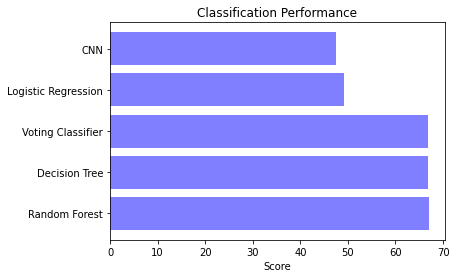

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()